## 作業
1. 請用 numpy 建立一個 10 x 10, 數值分布自 -1.0 ~ 1.0 的矩陣並繪製 Heatmap
2. 請用 numpy 建立一個 1000 x 3, 數值分布為 -1.0 ~ 1.0 的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)
3. 請用 numpy 建立一個 1000 x 3, 數值分布為常態分佈的矩陣，並繪製 PairPlot (上半部為 scatter, 對角線為 hist, 下半部為 density)

# [作業目標]
- 試著設定隨機資料, 並依照範例練習基礎與進階的 Heatmap

# [作業重點]
- 如題1.條件隨機矩陣, 並仿造基礎 Heatmap 範例作圖   
(In[2], OUT[2]) (Hint : numpy.random.random - 均勻分布, 隨機小數)
- 如題2.3.條件隨機數值列, 並仿造進階 Heatmap 範例作圖  
(In[3], OUT[3], In[4], OUT[4]) (Hint : numpy.random.randn - 常態分布)

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
plt.style.use('ggplot')

# 忽略警告訊息
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

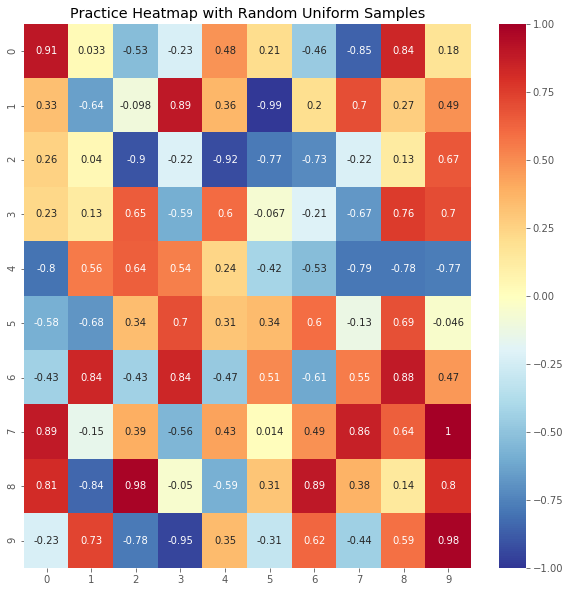

In [2]:
data = 2 * np.random.random(100) - 1 # 數值分布自 -1.0 ~ 1.0
matrix = pd.DataFrame(data.reshape((10, 10)))

plt.figure(figsize=(10,10))

heatmap = sns.heatmap(matrix, cmap = plt.cm.RdYlBu_r, vmin = -1, annot = True, vmax = 1)
plt.title('Practice Heatmap with Random Uniform Samples')
plt.show()

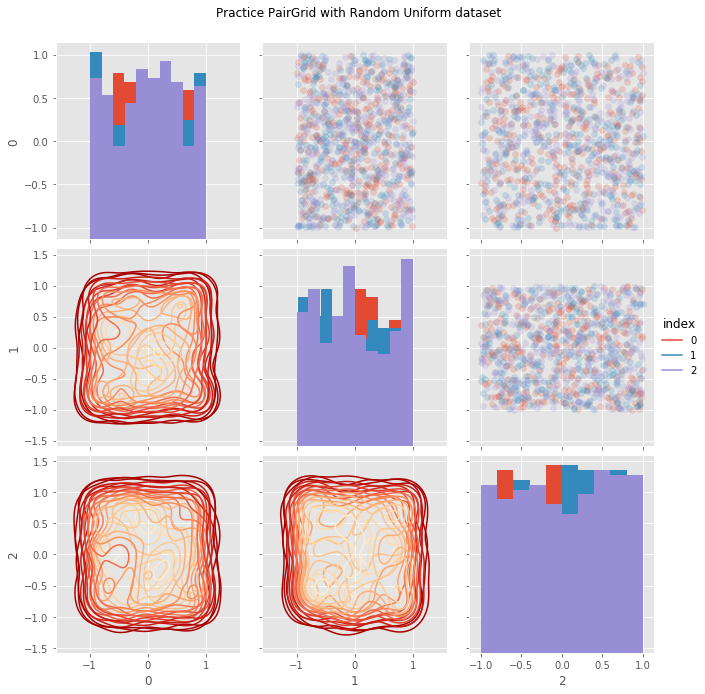

In [3]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
data = 2 * np.random.random(3000) - 1
matrix = pd.DataFrame(data.reshape((1000, 3)))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size = nrow)
matrix.index = indice
plot_data = pd.DataFrame(matrix).reset_index() # 原本的index變成column，新增預設的index

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, 
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index'])
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)
grid.add_legend()

plt.suptitle('Practice PairGrid with Random Uniform dataset', y = 1.05)
plt.show()

In [ ]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
data = np.random.randn(3000)
matrix = pd.DataFrame(data.reshape(1000, 3))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
matrix.index = indice
plot_data = pd.DataFrame(matrix).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'index', vars = [x for x in list(plot_data.columns) if x != 'index']) # 除了 index 之外的變數
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)
grid.add_legend()

plt.suptitle('Practice PairGrid with Random Normal dataset', y = 1.05)
plt.show()

#### 如果代入範例的相關係數函式，可以把散佈圖加上相關係數

In [ ]:
# 定義函數 : 計算兩個 column 之間的相關係數
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca() # Get the Current Axes, creating one if necessary.
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

In [ ]:
nrow = 1000
ncol = 3
"""
Your Code Here
"""
data = np.random.randn(3000)
matrix = pd.DataFrame(data.reshape(1000, 3))

# 隨機給予 0, 1, 2 三種標籤
indice = np.random.choice([0,1,2], size=nrow)
matrix.index = indice
plot_data = pd.DataFrame(matrix).reset_index()

# 繪製 seborn 進階 Heatmap
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False, vars = [x for x in list(plot_data.columns) if x != 'index']) # 除了 index 之外的變數
"""
Your Code Here
Please replace "..." to correct plot function
"""
grid.map_upper(plt.scatter , alpha = 0.2)
grid.map_upper(corr_func)
grid.map_diag(plt.hist)
grid.map_lower(sns.kdeplot , cmap = plt.cm.OrRd_r)
grid.add_legend()

plt.suptitle('Practice PairGrid with Random Normal dataset', y = 1.05)
plt.show()

### 參考資料：
>[plt.suptitle](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html)

>[sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)